# Laboratory 6  
**Name:** Rod Vincent Dela Vega

**Section:** DS4A

---

**Instruction**: Convert the following CNN architecture diagram into a PyTorch CNN Architecture.

NN Architecture Example

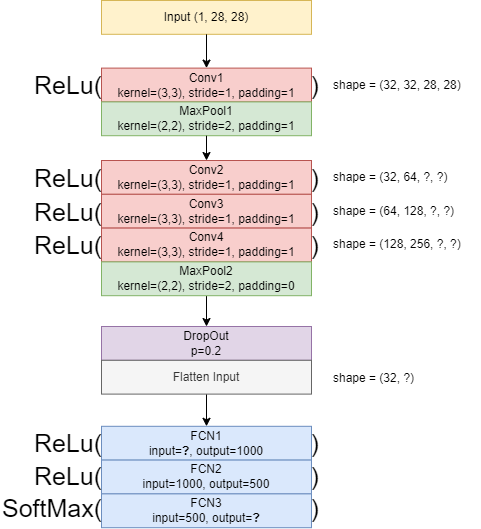

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='data', train=False, download=True, transform=transform)

0.3%

0.7%

1.0%

1.3%

1.7%

2.0%

2.3%

2.6%

3.0%

3.3%

3.6%

4.0%

4.3%

4.6%

5.0%

5.3%

5.6%

6.0%

6.3%

6.6%

6.9%

7.3%

7.6%

7.9%

8.3%

8.6%

8.9%

9.3%

9.6%

9.9%

10.2%

10.6%

10.9%

11.2%

11.6%

11.9%

12.2%

12.6%

12.9%

13.2%

13.6%

13.9%

14.2%

14.5%

14.9%

15.2%

15.5%

15.9%

16.2%

16.5%

16.9%

17.2%

17.5%

17.9%

18.2%

18.5%

18.8%

19.2%

19.5%

19.8%

20.2%

20.5%

20.8%

21.2%

21.5%

21.8%

22.1%

22.5%

22.8%

23.1%

23.5%

23.8%

24.1%

24.5%

24.8%

25.1%

25.5%

25.8%

26.1%

26.4%

26.8%

27.1%

27.4%

27.8%

28.1%

28.4%

28.8%

29.1%

29.4%

29.8%

30.1%

30.4%

30.7%

31.1%

31.4%

31.7%

32.1%

32.4%

32.7%

33.1%

33.4%

33.7%

34.0%

34.4%

34.7%

35.0%

35.4%

35.7%

36.0%

36.4%

36.7%

37.0%

37.4%

37.7%

38.0%

38.3%

38.7%

39.0%

39.3%

39.7%

40.0%

40.3%

40.7%

41.0%

41.3%

41.7%

42.0%

42.3%

42.6%

43.0%

43.3%

43.6%

44.0%

44.3%

44.6%

45.0%

45.3%

45.6%

45.9%

46.3%

46.6%

46.9%

47.3%

47.6%

47.9%

48.3%

48.6%

48.9%

49.3%

49.6%

49.9%

50.2%

50.6%

50.9%

51.2%

51.6%

51.9%

52.2%

52.6%

52.9%

53.2%

53.6%

53.9%

54.2%

54.5%

54.9%

55.2%

55.5%

55.9%

56.2%

56.5%

56.9%

57.2%

57.5%

57.9%

58.2%

58.5%

58.8%

59.2%

59.5%

59.8%

60.2%

60.5%

60.8%

61.2%

61.5%

61.8%

62.1%

62.5%

62.8%

63.1%

63.5%

63.8%

64.1%

64.5%

64.8%

65.1%

65.5%

65.8%

66.1%

66.4%

66.8%

67.1%

67.4%

67.8%

68.1%

68.4%

68.8%

69.1%

69.4%

69.8%

70.1%

70.4%

70.7%

71.1%

71.4%

71.7%

72.1%

72.4%

72.7%

73.1%

73.4%

73.7%

74.0%

74.4%

74.7%

75.0%

75.4%

75.7%

76.0%

76.4%

76.7%

77.0%

77.4%

77.7%

78.0%

78.3%

78.7%

79.0%

79.3%

79.7%

80.0%

80.3%

80.7%

81.0%

81.3%

81.7%

82.0%

82.3%

82.6%

83.0%

83.3%

83.6%

84.0%

84.3%

84.6%

85.0%

85.3%

85.6%

85.9%

86.3%

86.6%

86.9%

87.3%

87.6%

87.9%

88.3%

88.6%

88.9%

89.3%

89.6%

89.9%

90.2%

90.6%

90.9%

91.2%

91.6%

91.9%

92.2%

92.6%

92.9%

93.2%

93.6%

93.9%

94.2%

94.5%

94.9%

95.2%

95.5%

95.9%

96.2%

96.5%

96.9%

97.2%

97.5%

97.9%

98.2%

98.5%

98.8%

99.2%

99.5%

99.8%

100.0%

100.0%

2.0%

4.0%

6.0%

7.9%

9.9%

11.9%

13.9%

15.9%

17.9%

19.9%

21.9%

23.8%

25.8%

27.8%

29.8%

31.8%

33.8%

35.8%

37.8%

39.7%

41.7%

43.7%

45.7%

47.7%

49.7%

51.7%

53.7%

55.6%

57.6%

59.6%

61.6%

63.6%

65.6%

67.6%

69.6%

71.5%

73.5%

75.5%

77.5%

79.5%

81.5%

83.5%

85.5%

87.4%

89.4%

91.4%

93.4%

95.4%

97.4%

99.4%

100.0%

100.0%

In [3]:
train_set, val_set = torch.utils.data.random_split(train_data, [0.8, 0.2])

In [4]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

set_seed(143)

In [5]:
batch_size = 10
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [6]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)

        self.dropout = nn.Dropout(p=0.2)
        self.flatten = nn.Flatten()

        self.fcn1 = nn.Linear(256*7*7, 1000)
        self.fcn2 = nn.Linear(1000, 500)
        self.fcn3 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # shape = (1, 32, 28, 28)
        x = self.pool1(x)         # shape = (32, 15, 15)
        x = F.relu(self.conv2(x)) # shape = (32, 64, 15, 15)
        x = F.relu(self.conv3(x)) # shape = (64, 128, 15, 15)
        x = F.relu(self.conv4(x)) # shape = (128, 256, 15, 15)
        x = self.pool2(x)         # shape = (256, 7, 7)
        x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.fcn1(x))  # shape = (256*7*7, 1000)
        x = F.relu(self.fcn2(x))  # shape = (1000, 500)
        x = self.fcn3(x)          # shape = (500, 10)
        return x

In [7]:
# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5

for epoch in range(epochs):
    model.train()
    train_corr = 0
    for x_train, y_train in train_loader:
        x_train, y_train = x_train.to(device), y_train.to(device)

        output = model(x_train)
        loss = criterion(output, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1)
        train_corr += pred.eq(y_train).sum().item()

    model.eval()
    val_corr = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val, y_val = x_val.to(device), y_val.to(device)

            output = model(x_val)

            pred = output.argmax(dim=1)
            val_corr += pred.eq(y_val).sum().item()

    train_acc = train_corr / len(train_set)
    val_acc = val_corr / len(val_set)

    print(f"Epoch {epoch+1}: Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

KeyboardInterrupt: 

In [ ]:
# Testing
true_labels = []
pred_labels = []

with torch.no_grad():
    for b, (x_test, y_test) in enumerate(test_loader):

        x_test = x_test.to(device)
        y_test = y_test.to(device)

        test_pred = model(x_test)
        test_pred_vec = torch.max(test_pred.data, 1)[1]

        true_labels.append(y_test)
        pred_labels.append(test_pred_vec)

true_labels = torch.cat(true_labels, dim=0)
pred_labels = torch.cat(pred_labels, dim=0)

confusion_matrix(true_labels.to('cpu'), pred_labels.to('cpu'))

array([[ 975,    0,    0,    0,    0,    1,    0,    1,    3,    0],
       [   0, 1128,    0,    3,    0,    1,    2,    1,    0,    0],
       [   0,    4, 1016,    0,    0,    0,    0,    3,    9,    0],
       [   0,    0,    1,  999,    0,    5,    0,    1,    4,    0],
       [   0,    0,    0,    0,  970,    0,    2,    0,    0,   10],
       [   0,    0,    0,    4,    0,  885,    1,    1,    0,    1],
       [   4,    2,    0,    0,    2,    1,  948,    0,    1,    0],
       [   0,    3,    4,    1,    0,    0,    0, 1017,    1,    2],
       [   2,    0,    0,    0,    0,    1,    1,    0,  968,    2],
       [   0,    0,    0,    0,    4,    5,    0,    3,    2,  995]])